##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **GSE217517**

file previously downloaded:
GSE217517_RAW.tar

unzipped using 
``` bash
tar -xvf GSE217517_RAW.tar
```

This gives the following files: 
* GSM6720925_single_cell_barcodes_2251.tsv.gz
* GSM6720925_single_cell_features_2251.tsv.gz
* GSM6720925_single_cell_matrix_2251.mtx.gz
* GSM6720926_single_cell_barcodes_2267.tsv.gz
* GSM6720926_single_cell_features_2267.tsv.gz
* GSM6720926_single_cell_matrix_2267.mtx.gz
* GSM6720927_single_cell_barcodes_2283.tsv.gz
* GSM6720927_single_cell_features_2283.tsv.gz
* GSM6720927_single_cell_matrix_2283.mtx.gz
* GSM6720928_single_cell_barcodes_2293.tsv.gz
* GSM6720928_single_cell_features_2293.tsv.gz
* GSM6720928_single_cell_matrix_2293.mtx.gz
* GSM6720929_single_cell_barcodes_2380.tsv.gz
* GSM6720929_single_cell_features_2380.tsv.gz
* GSM6720929_single_cell_matrix_2380.mtx.gz
* GSM6720930_single_cell_barcodes_2428.tsv.gz
* GSM6720930_single_cell_features_2428.tsv.gz
* GSM6720930_single_cell_matrix_2428.mtx.gz
* GSM6720931_single_cell_barcodes_2467.tsv.gz
* GSM6720931_single_cell_features_2467.tsv.gz
* GSM6720931_single_cell_matrix_2467.mtx.gz
* GSM6720932_single_cell_barcodes_2497.tsv.gz
* GSM6720932_single_cell_features_2497.tsv.gz
* GSM6720932_single_cell_matrix_2497.mtx.gz
* GSM6720933_pooled_single_cell_barcodes_12162021.tsv.gz
* GSM6720933_pooled_single_cell_features_12162021.tsv.gz
* GSM6720933_pooled_single_cell_matrix_12162021.mtx.gz
* GSM6720934_pooled_single_cell_barcodes_01132022.tsv.gz
* GSM6720934_pooled_single_cell_features_01132022.tsv.gz
* GSM6720934_pooled_single_cell_matrix_01132022.mtx.gz
* GSM6720935_bulk_chunk_ribo_2251_STAR.tsv.gz
* GSM6720936_bulk_chunk_ribo_2267_STAR.tsv.gz
* GSM6720937_bulk_chunk_ribo_2283_STAR.tsv.gz
* GSM6720938_bulk_chunk_ribo_2293_STAR.tsv.gz
* GSM6720939_bulk_chunk_ribo_2380_STAR.tsv.gz
* GSM6720940_bulk_chunk_ribo_2428_STAR.tsv.gz
* GSM6720941_bulk_chunk_ribo_2467_STAR.tsv.gz
* GSM6720942_bulk_chunk_ribo_2497_STAR.tsv.gz
* GSM6720943_bulk_dissociated_ribo_2251_STAR.tsv.gz
* GSM6720944_bulk_dissociated_ribo_2267_STAR.tsv.gz
* GSM6720945_bulk_dissociated_ribo_2283_STAR.tsv.gz
* GSM6720946_bulk_dissociated_ribo_2293_STAR.tsv.gz
* GSM6720947_bulk_dissociated_ribo_2380_STAR.tsv.gz
* GSM6720948_bulk_dissociated_ribo_2428_STAR.tsv.gz
* GSM6720949_bulk_dissociated_ribo_2467_STAR.tsv.gz
* GSM6720950_bulk_dissociated_ribo_2497_STAR.tsv.gz
* GSM6720951_bulk_dissociated_polyA_2251_STAR.tsv.gz
* GSM6720952_bulk_dissociated_polyA_2267_STAR.tsv.gz
* GSM6720953_bulk_dissociated_polyA_2283_STAR.tsv.gz
* GSM6720954_bulk_dissociated_polyA_2293_STAR.tsv.gz
* GSM6720955_bulk_dissociated_polyA_2380_STAR.tsv.gz
* GSM6720956_bulk_dissociated_polyA_2428_STAR.tsv.gz
* GSM6720957_bulk_dissociated_polyA_2467_STAR.tsv.gz
* GSM6720958_bulk_dissociated_polyA_2497_STAR.tsv.gz

Only interested in scRNAseq files.
Files were then organised into seperate folders for each patient and named with correct file names.

In [1]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/LB_Test_GSE217517')
getwd()

[1] "/scratch/user/s4436039/Nikita-project"

[1] "/scratch/user/s4436039/scdata/LB_Test_GSE217517"

In [2]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




In [3]:
#load all datasets
OC_2251.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/LB_Test_GSE217517/LB_2251")


In [5]:
head(colnames(OC_2251.data))

[1] "AAACCCAAGATTGACA-1" "AAACCCAAGCATGGGT-1" "AAACCCAAGCGACATG-1"
[4] "AAACCCAAGTAGCATA-1" "AAACCCAAGTCACGCC-1" "AAACCCAAGTCGAAGC-1"

In [6]:
#Add dataset info to colnames
colnames(OC_2251.data) <- paste0("GSE217517_pt1_", colnames(OC_2251.data))



In [8]:
head(colnames(OC_2251.data))

[1] "GSE217517_pt1_AAACCCAAGATTGACA-1" "GSE217517_pt1_AAACCCAAGCATGGGT-1"
[3] "GSE217517_pt1_AAACCCAAGCGACATG-1" "GSE217517_pt1_AAACCCAAGTAGCATA-1"
[5] "GSE217517_pt1_AAACCCAAGTCACGCC-1" "GSE217517_pt1_AAACCCAAGTCGAAGC-1"

In [9]:
#create seperate seurat object for each sample
OC_pt1 <- CreateSeuratObject(counts = OC_2251.data, project = "GSE217517", min.features = 200)

#add metadata to sample
OC_pt1@meta.data$sample_type <- "tumour"
OC_pt1@meta.data$cancer_type <- "HGSOC"
OC_pt1@meta.data$patient_id <- "pt1"
OC_pt1@meta.data$sample_id <- "GSE217517_HGSOC_pt1"

In [10]:
head(OC_pt1)

orig.ident nCount_RNA nFeature_RNA sample_type
GSE217517_pt1_AAACCCAAGATTGACA-1 GSE217517  14447      2170         tumour     
GSE217517_pt1_AAACCCAAGCATGGGT-1 GSE217517   6913      2328         tumour     
GSE217517_pt1_AAACCCAAGCGACATG-1 GSE217517   2608      1384         tumour     
GSE217517_pt1_AAACCCAAGTAGCATA-1 GSE217517   2190      1047         tumour     
GSE217517_pt1_AAACCCAAGTCACGCC-1 GSE217517   5445      1893         tumour     
GSE217517_pt1_AAACCCAAGTCGAAGC-1 GSE217517    639       419         tumour     
GSE217517_pt1_AAACCCACACTTGTCC-1 GSE217517  13979      3957         tumour     
GSE217517_pt1_AAACCCACAGTTTCGA-1 GSE217517    628       458         tumour     
GSE217517_pt1_AAACCCAGTGACTCTA-1 GSE217517   2499      1294         tumour     
GSE217517_pt1_AAACCCAGTGTGCCTG-1 GSE217517   3028      1083         tumour     
                                 cancer_type patient_id sample_id          
GSE217517_pt1_AAACCCAAGATTGACA-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCAAGCATGGGT-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCAAGCGACATG-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCAAGTAGCATA-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCAAGTCACGCC-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCAAGTCGAAGC-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCACACTTGTCC-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCACAGTTTCGA-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCAGTGACTCTA-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCAGTGTGCCTG-1 HGSOC       pt1        GSE217517_HGSOC_pt1

In [11]:
head(OC_pt1@meta.data) 

orig.ident nCount_RNA nFeature_RNA sample_type
GSE217517_pt1_AAACCCAAGATTGACA-1 GSE217517  14447      2170         tumour     
GSE217517_pt1_AAACCCAAGCATGGGT-1 GSE217517   6913      2328         tumour     
GSE217517_pt1_AAACCCAAGCGACATG-1 GSE217517   2608      1384         tumour     
GSE217517_pt1_AAACCCAAGTAGCATA-1 GSE217517   2190      1047         tumour     
GSE217517_pt1_AAACCCAAGTCACGCC-1 GSE217517   5445      1893         tumour     
GSE217517_pt1_AAACCCAAGTCGAAGC-1 GSE217517    639       419         tumour     
                                 cancer_type patient_id sample_id          
GSE217517_pt1_AAACCCAAGATTGACA-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCAAGCATGGGT-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCAAGCGACATG-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCAAGTAGCATA-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCAAGTCACGCC-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCAAGTCGAAGC-1 HGSOC       pt1        GSE217517_HGSOC_pt1

In [12]:
OC_pt1

An object of class Seurat 
36601 features across 13236 samples within 1 assay 
Active assay: RNA (36601 features, 0 variable features)
 1 layer present: counts

In [13]:
#Merge seurat objects

OC <- merge(OC_pt1, project = "GSE217517")

In [14]:
OC
head(OC@meta.data)
tail(OC@meta.data)

An object of class Seurat 
36601 features across 13236 samples within 1 assay 
Active assay: RNA (36601 features, 0 variable features)
 1 layer present: counts

orig.ident nCount_RNA nFeature_RNA sample_type
GSE217517_pt1_AAACCCAAGATTGACA-1 GSE217517  14447      2170         tumour     
GSE217517_pt1_AAACCCAAGCATGGGT-1 GSE217517   6913      2328         tumour     
GSE217517_pt1_AAACCCAAGCGACATG-1 GSE217517   2608      1384         tumour     
GSE217517_pt1_AAACCCAAGTAGCATA-1 GSE217517   2190      1047         tumour     
GSE217517_pt1_AAACCCAAGTCACGCC-1 GSE217517   5445      1893         tumour     
GSE217517_pt1_AAACCCAAGTCGAAGC-1 GSE217517    639       419         tumour     
                                 cancer_type patient_id sample_id          
GSE217517_pt1_AAACCCAAGATTGACA-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCAAGCATGGGT-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCAAGCGACATG-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCAAGTAGCATA-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCAAGTCACGCC-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCAAGTCGAAGC-1 HGSOC       pt1        GSE217517_HGSOC_pt1

orig.ident nCount_RNA nFeature_RNA sample_type
GSE217517_pt1_TTTGTTGCAGTATTCG-1 GSE217517    842       519         tumour     
GSE217517_pt1_TTTGTTGGTAAGACCG-1 GSE217517   4454      1765         tumour     
GSE217517_pt1_TTTGTTGGTGGATTTC-1 GSE217517  27434      5227         tumour     
GSE217517_pt1_TTTGTTGGTTTCGTTT-1 GSE217517    980       577         tumour     
GSE217517_pt1_TTTGTTGTCAAACCCA-1 GSE217517    951       495         tumour     
GSE217517_pt1_TTTGTTGTCGAGAGAC-1 GSE217517   2067      1177         tumour     
                                 cancer_type patient_id sample_id          
GSE217517_pt1_TTTGTTGCAGTATTCG-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_TTTGTTGGTAAGACCG-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_TTTGTTGGTGGATTTC-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_TTTGTTGGTTTCGTTT-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_TTTGTTGTCAAACCCA-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_TTTGTTGTCGAGAGAC-1 HGSOC       pt1        GSE217517_HGSOC_pt1

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


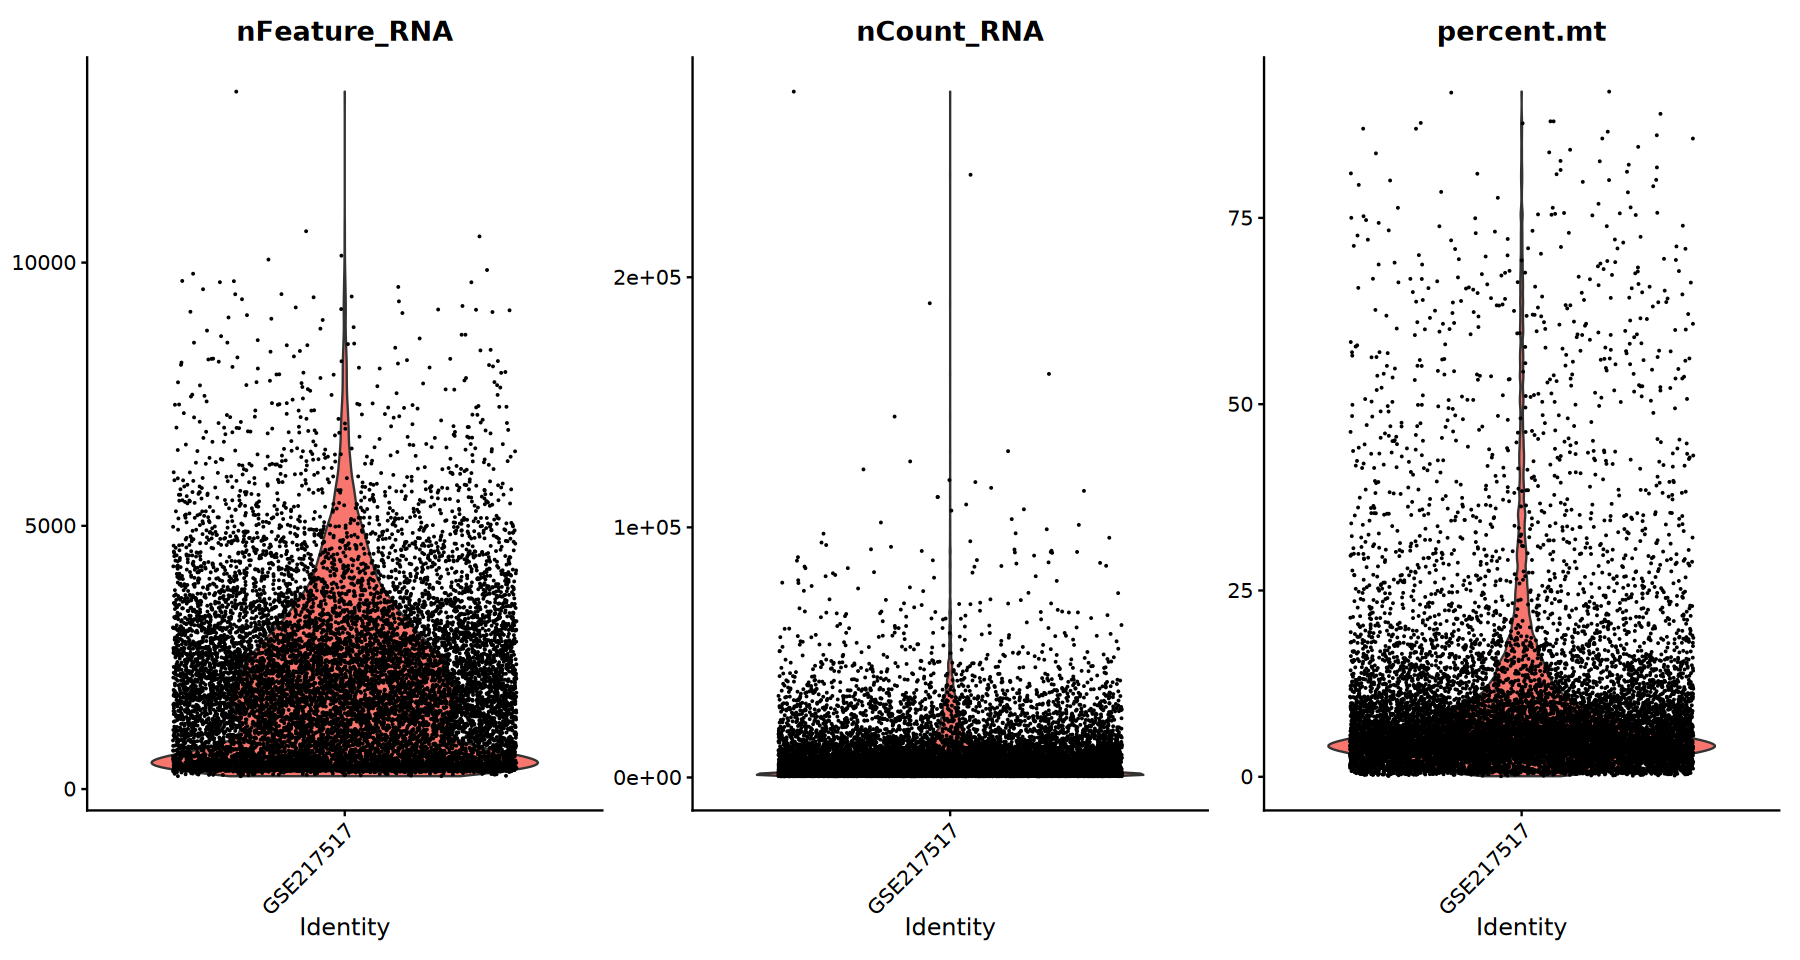

In [15]:
#QC Steps 
OC[["percent.mt"]] <- PercentageFeatureSet(OC, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(OC, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [16]:
#Normalise the data
OC <- NormalizeData(OC)
#Find variable features
OC <- FindVariableFeatures(OC, selection.method = "vst", nfeatures = 2000)
#Scale the data
OC <- ScaleData(OC, vars.to.regress = c("percent.mt", "nCount_RNA"))
#Run pca
OC <- RunPCA(OC, features = VariableFeatures(object = OC))

Normalizing layer: counts



Finding variable features for layer counts

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  IGHG1, IGHG3, IGHGP, MZB1, DERL3, IGLC2, H1FX, CD79A, IGLC3, SEC11C 
	   FKBP11, JCHAIN, IGLC1, SLAMF1, IGHM, TMEM107, KLHL6, IRF4, IGLV3-1, SSR4 
	   SPAG4, BFSP2, IGHG4, AC007569.1, SLAMF7, TEX14, HIST1H1C, ITM2C, LPXN, AC239799.2 
Negative:  AC024230.1, WWC1, IGF2BP2, KIAA1217, MAL2, C6orf132, DOK5, COBL, MACROD2, MAL2-AS1 
	   LINC00511, MEIS1, PROSER2, PAX8, EHF, SCNN1A, CDH1, RHPN2, LINC01876, KCNK1 
	   EFNA5, SGMS2, ATP1B1, PARD6B, SAMD12, ELF3, NIBAN2, ERRFI1, FAM160A1, DANT2 
PC_ 2 
Positive:  GFPT2, COL6A3, COL5A2, THBS2, CDH11, MEG3, GPC6, COL1A1, COL1A2, LSAMP 
	   NAV3, COL6A1, FBLN1, BICC1, SULF1, AEBP1, COL3A1, COL12A1, TIMP3, CCDC80 
	   DCN, CLMP, LUM, PDZRN3, MEG8, ADAM12, MMP2, PDGFRA, RARRES2, VCAN 
Negative:  AC024230.1, MAL2, ELF3, C6orf132, CDH1, EHF, ST14, SCNN1A, CLDN4, MAL2-AS1 
	   RHEX, WWC1, PARD6B, RHPN2, CLDN3, WFDC2, KR

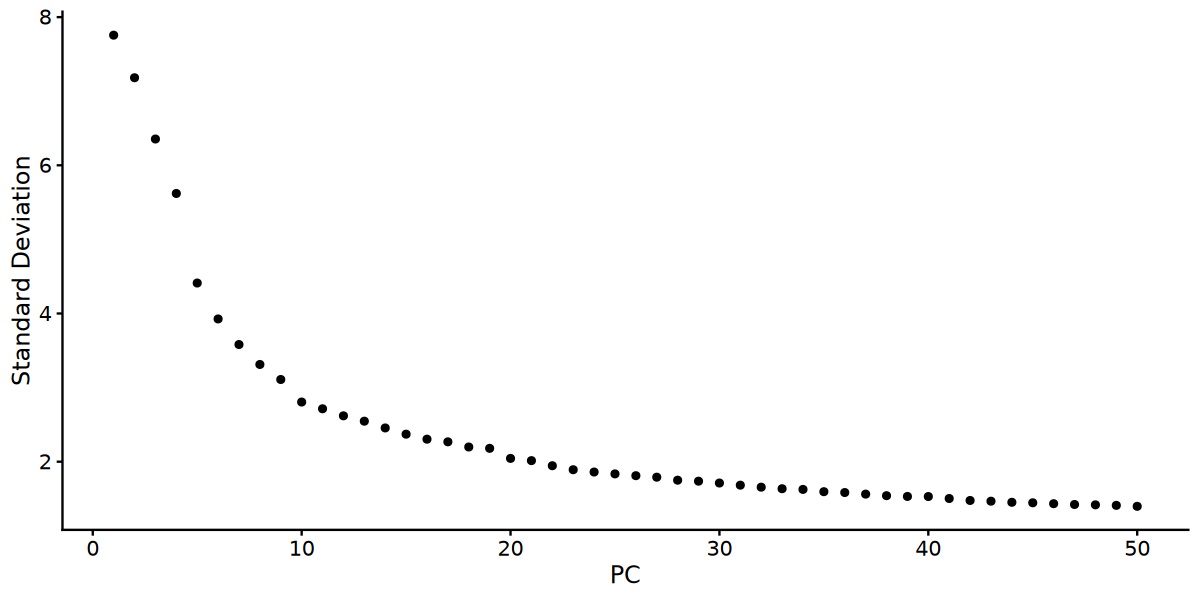

In [19]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(OC, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets

In [20]:
#Find neighbours (make sure number matches no. features chosen above)
OC <- FindNeighbors(OC, dims = 1:40)

Computing nearest neighbor graph



Computing SNN



In [21]:
#Run UMAP
OC <- RunUMAP(OC, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
10:32:43 UMAP embedding parameters a = 0.9922 b = 1.112

10:32:43 Read 13236 rows and found 40 numeric columns

10:32:43 Using Annoy for neighbor search, n_neighbors = 30

10:32:43 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:32:44 Writing NN index file to temp file /scratch/temp/17097919/RtmpoDssAl/file1044077254bd2c

10:32:44 Searching Annoy index using 1 thread, search_k = 3000

10:32:47 Annoy recall = 100%

10:32:47 Commencing smooth kNN distance calibration using 1 thread
 with

In [22]:
#Cluster, resolution here set to 0.2, originally tried 0.5 which gave heaps of clusters
OC <- FindClusters(OC, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13236
Number of edges: 524966

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9579
Number of communities: 15
Elapsed time: 1 seconds


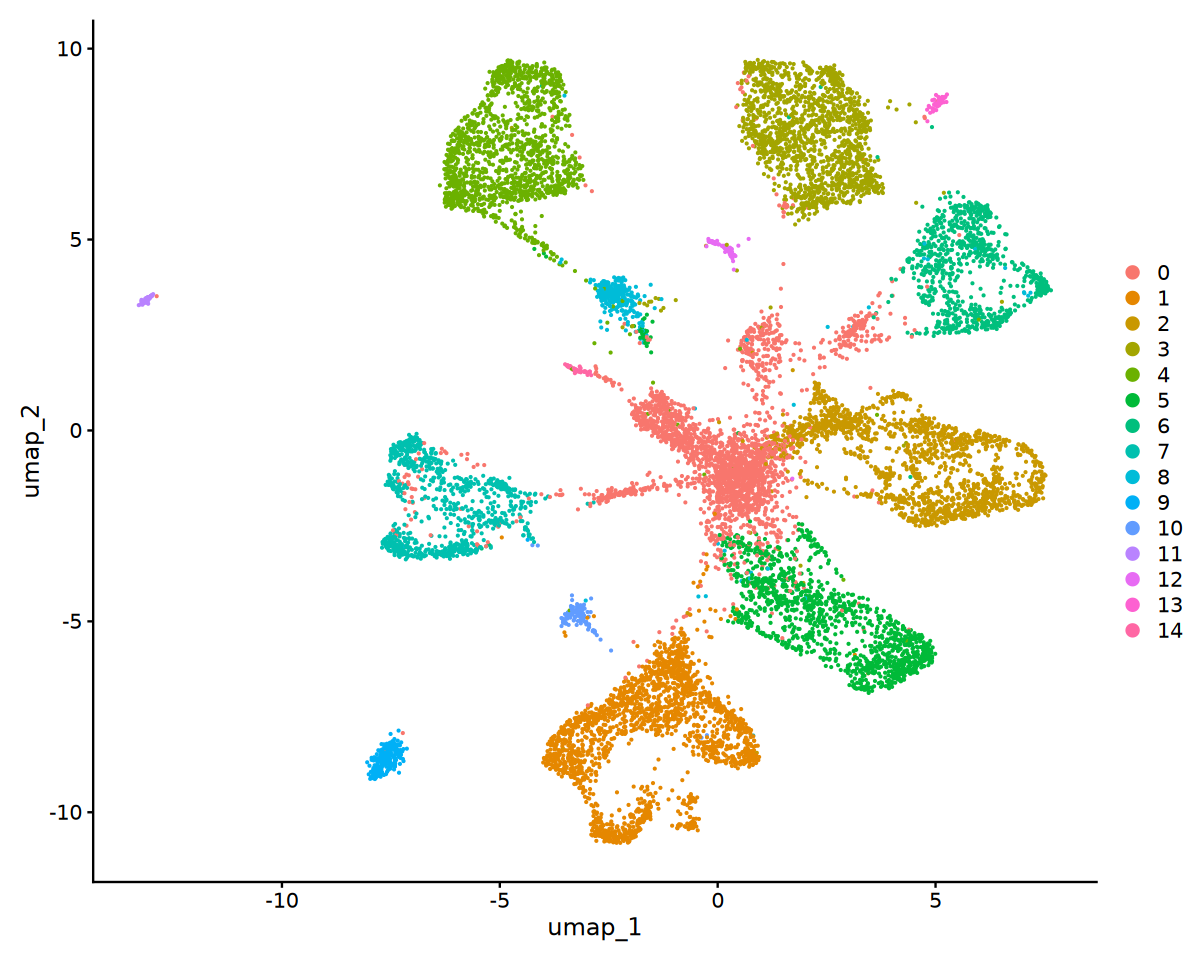

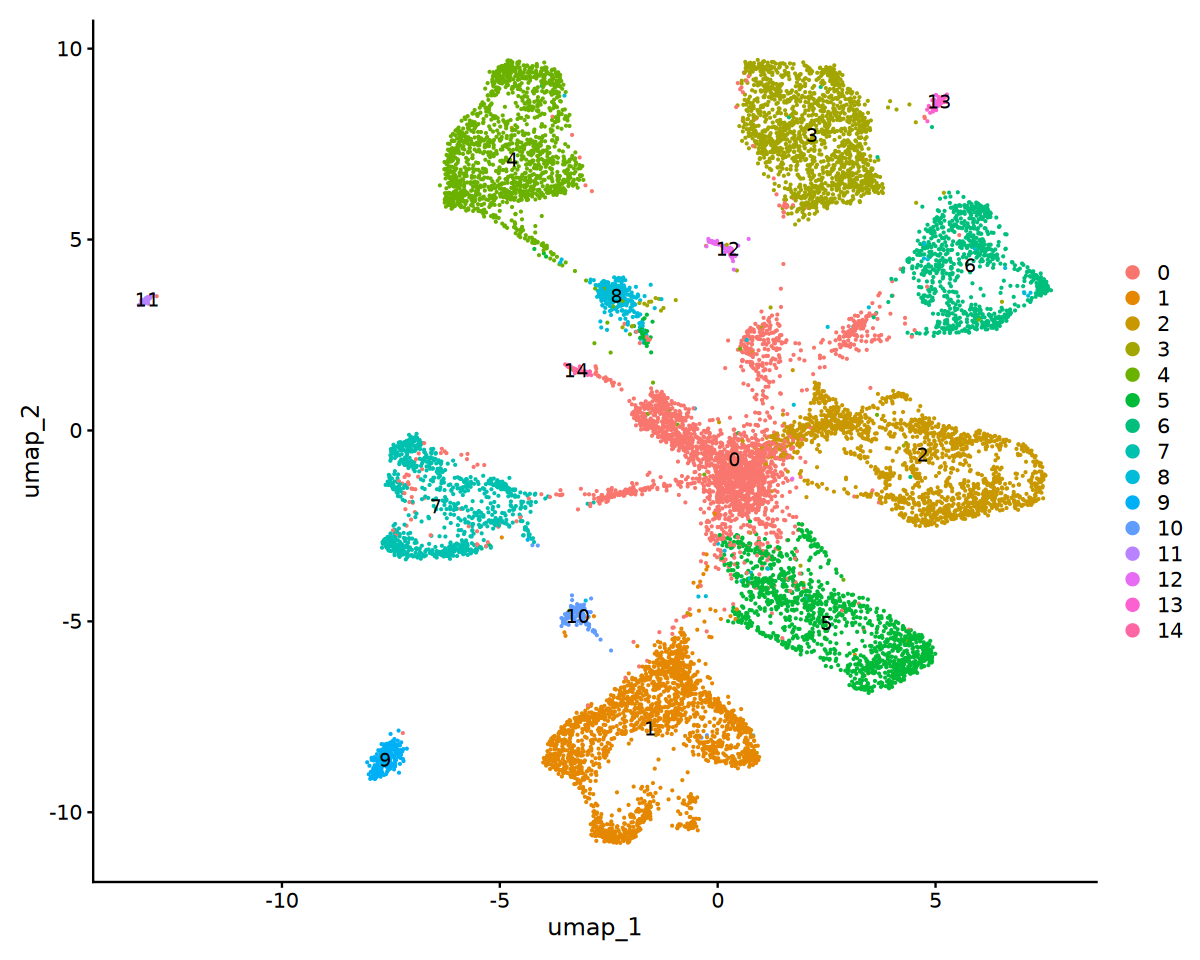

In [23]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(OC, reduction = "umap")
DimPlot(OC, reduction = "umap", label=TRUE)

In [24]:
#Save the object at this point so it can be loaded in without running steps above
saveRDS(OC, file = "/scratch/user/s4436039/scdata/LB_Test_GSE217517/GSE217517_LB.RDS")

#### Next part of code is about determining which cluster is the myeloid cells

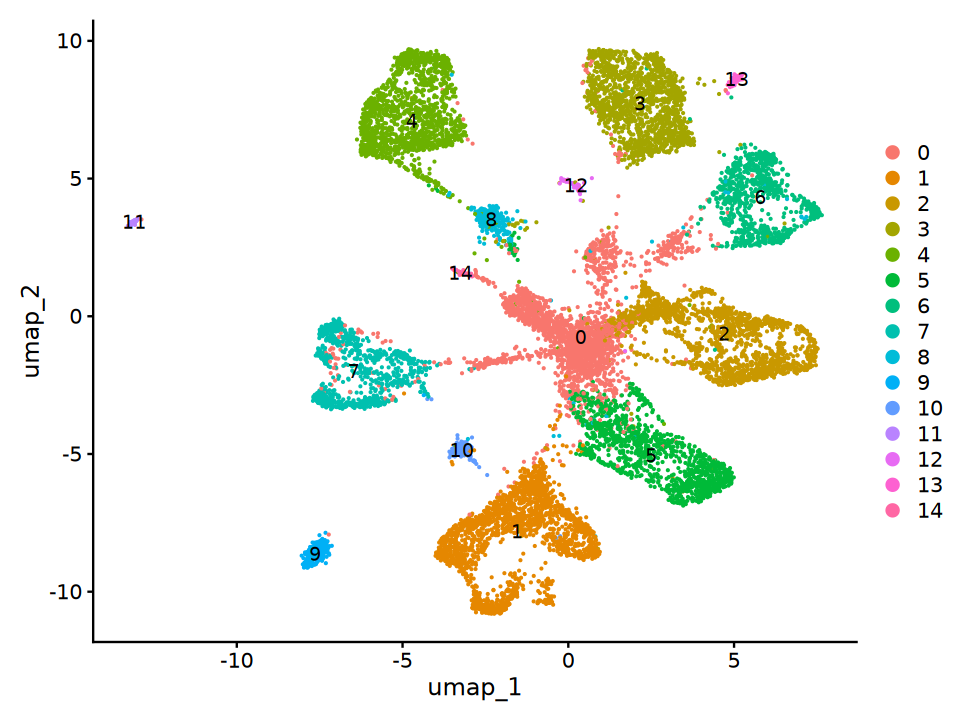

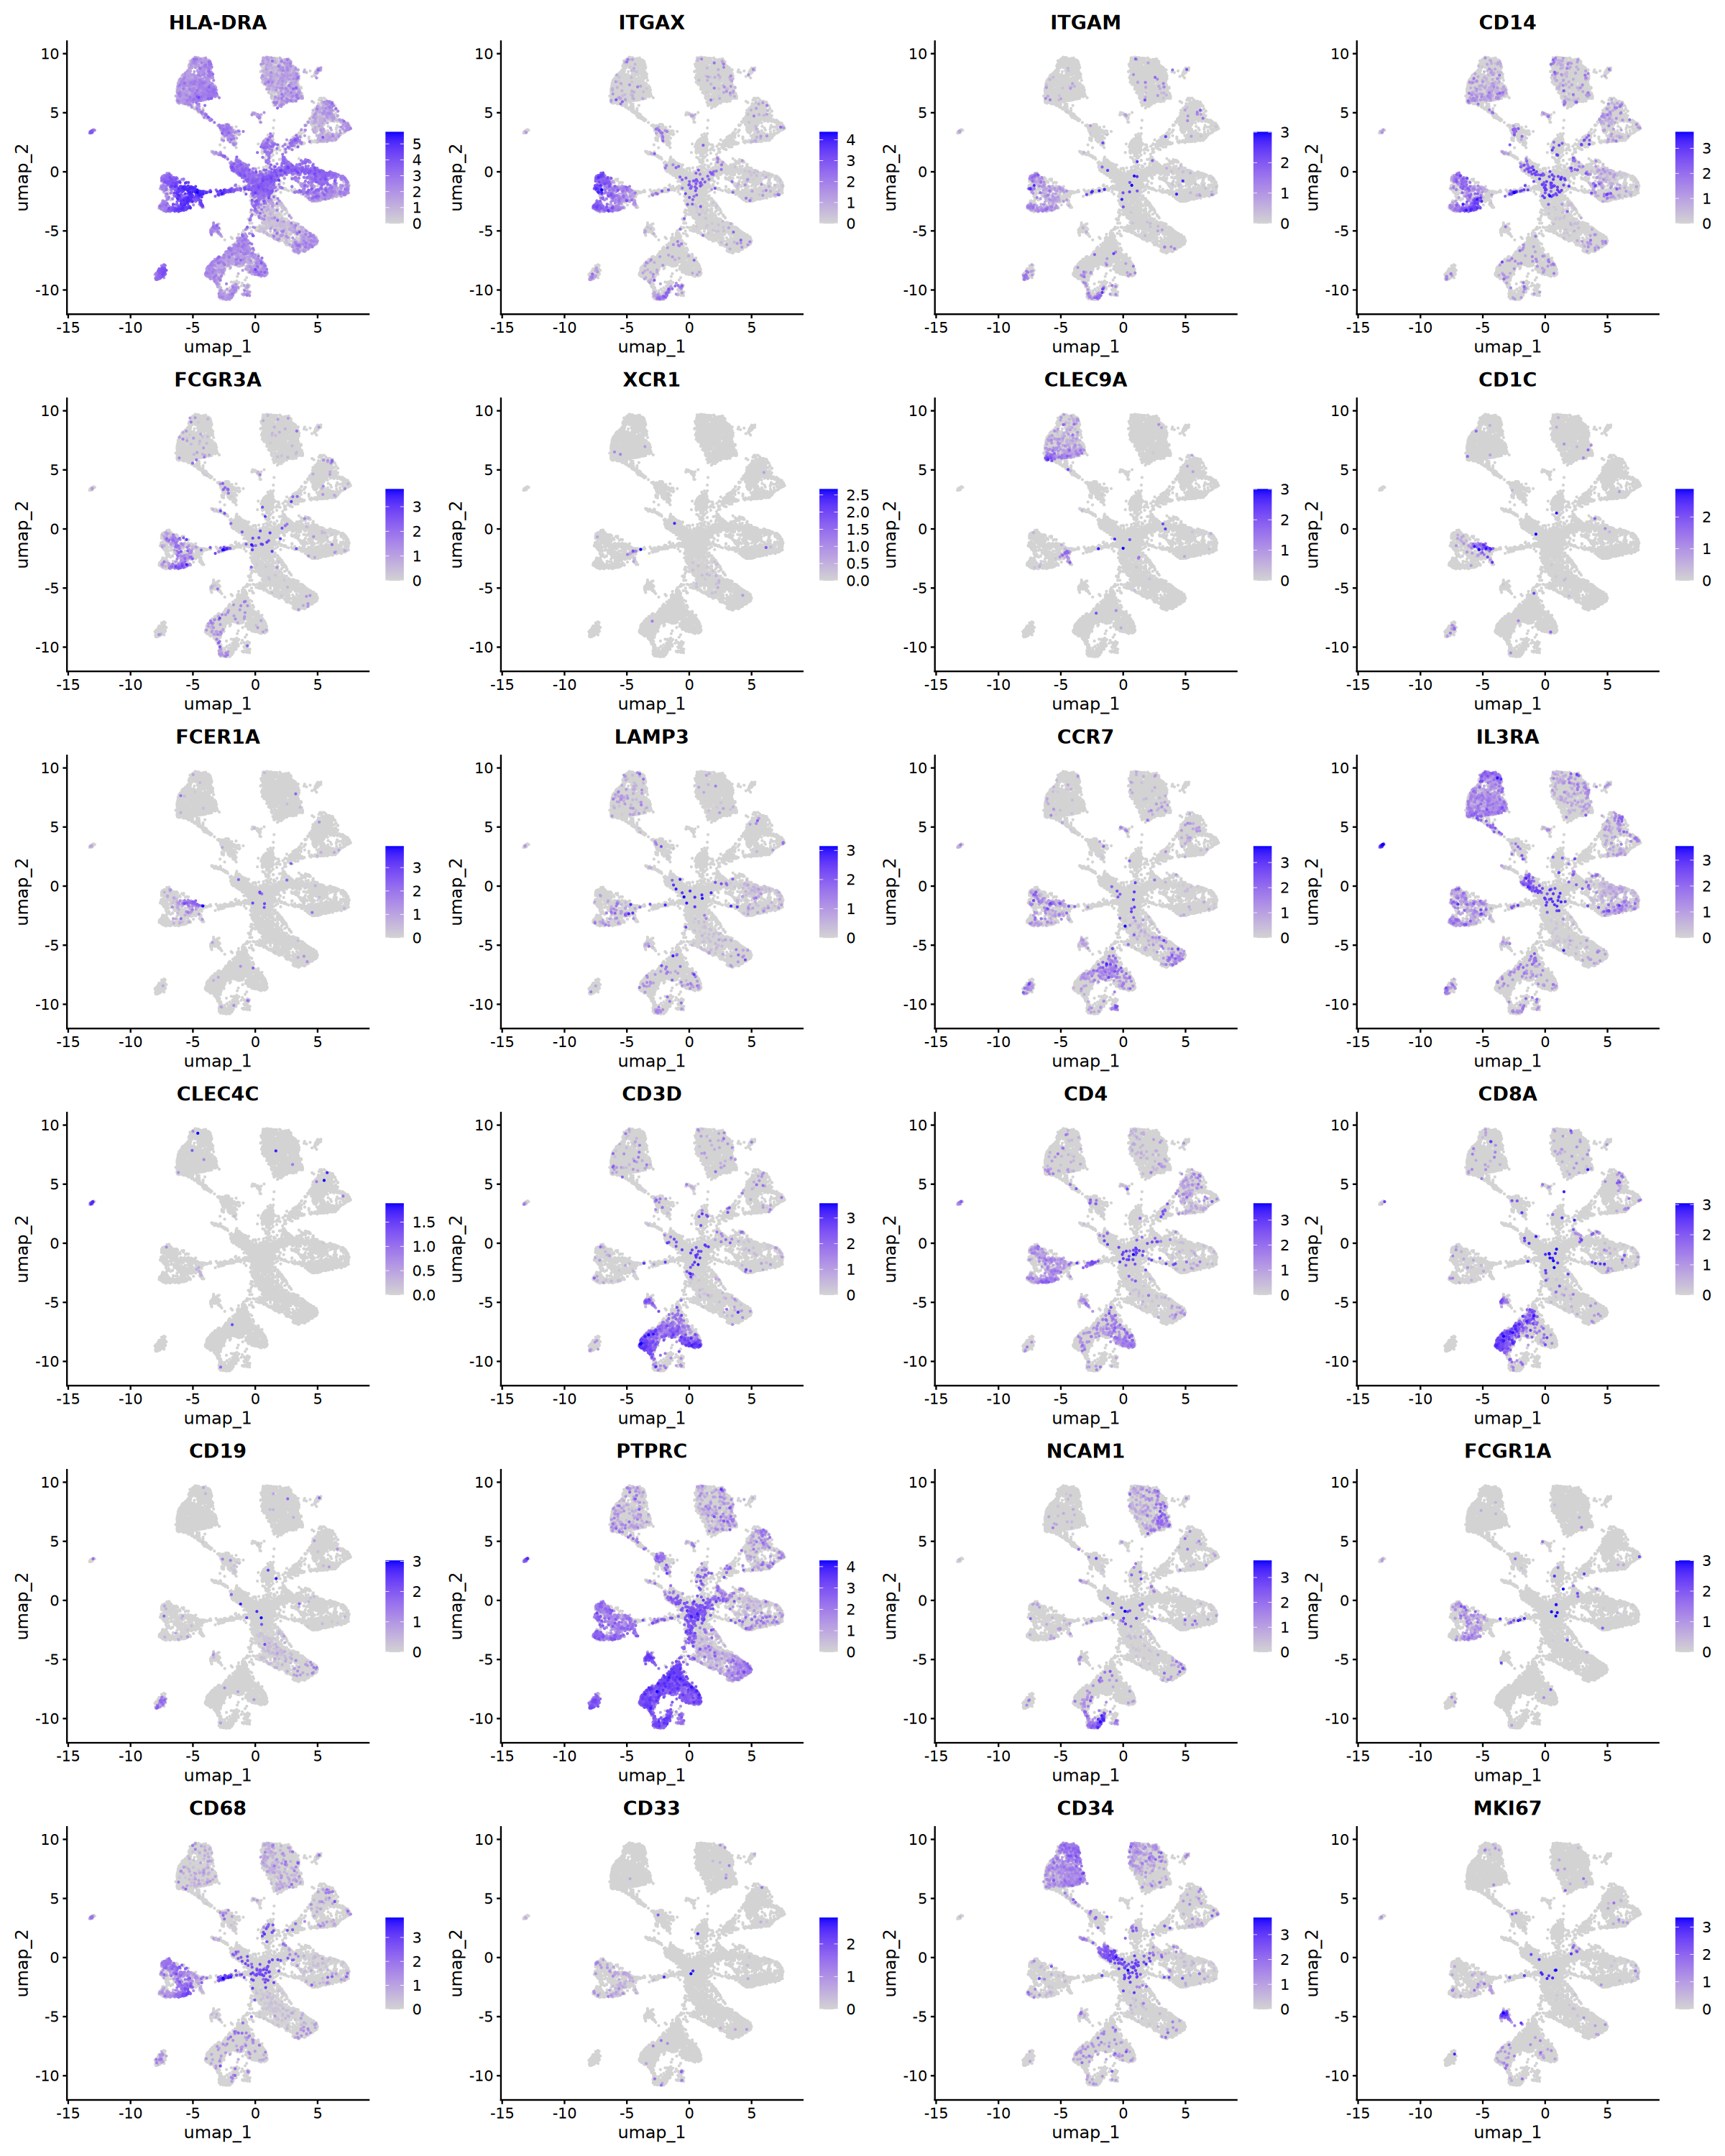

In [25]:
#plot genes over UMAP
options(repr.plot.height=6, repr.plot.width=8)
DimPlot(OC, reduction = "umap", label=TRUE)

options(repr.plot.height=25, repr.plot.width=20)
FeaturePlot(OC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67"), order = TRUE)

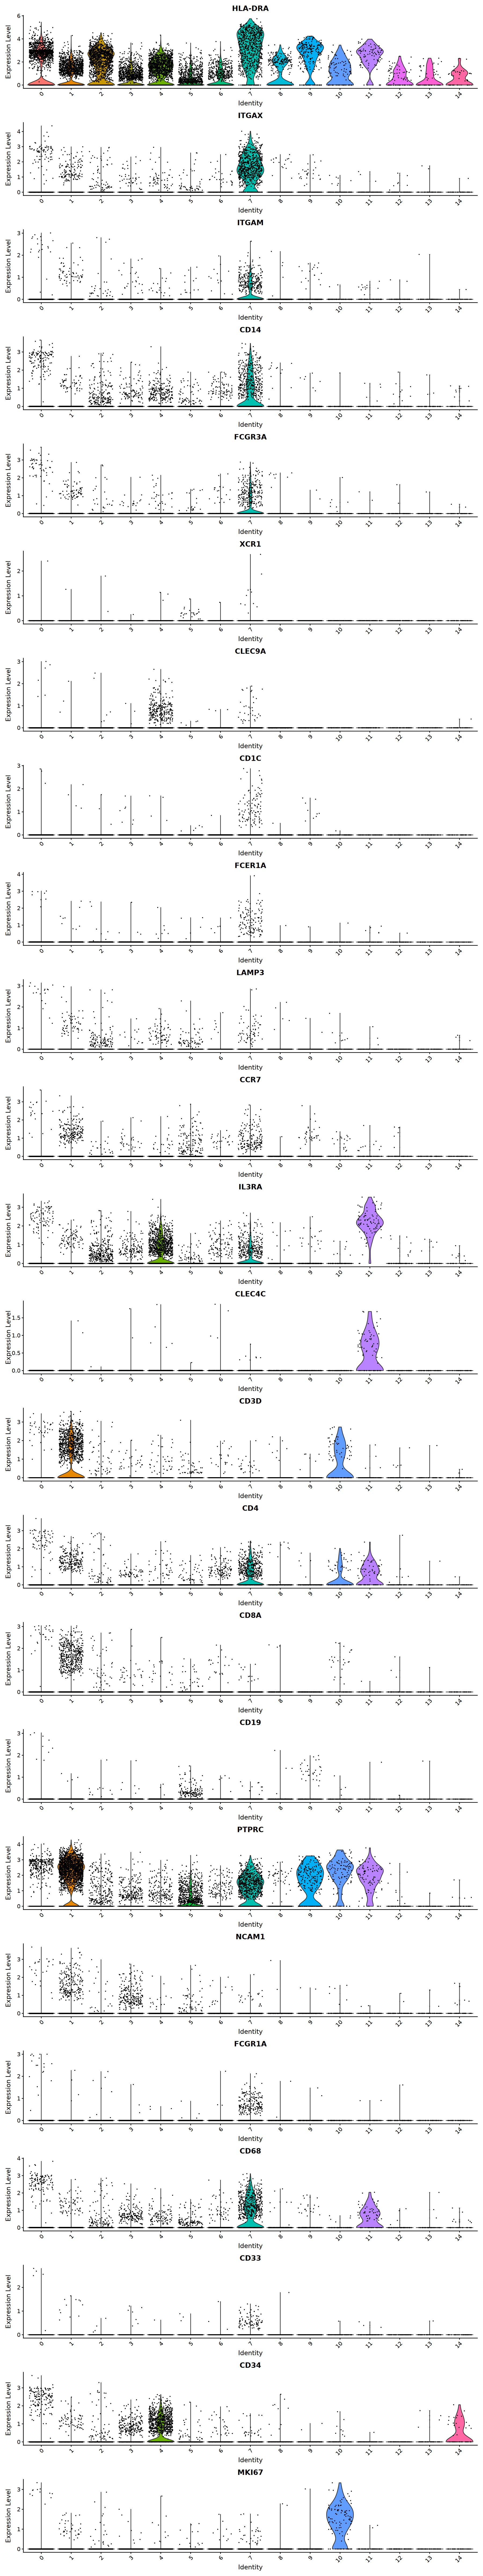

In [26]:
#Violin plots of classic markers
options(repr.plot.height=80, repr.plot.width=15)
VlnPlot(OC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67"), ncol=1)

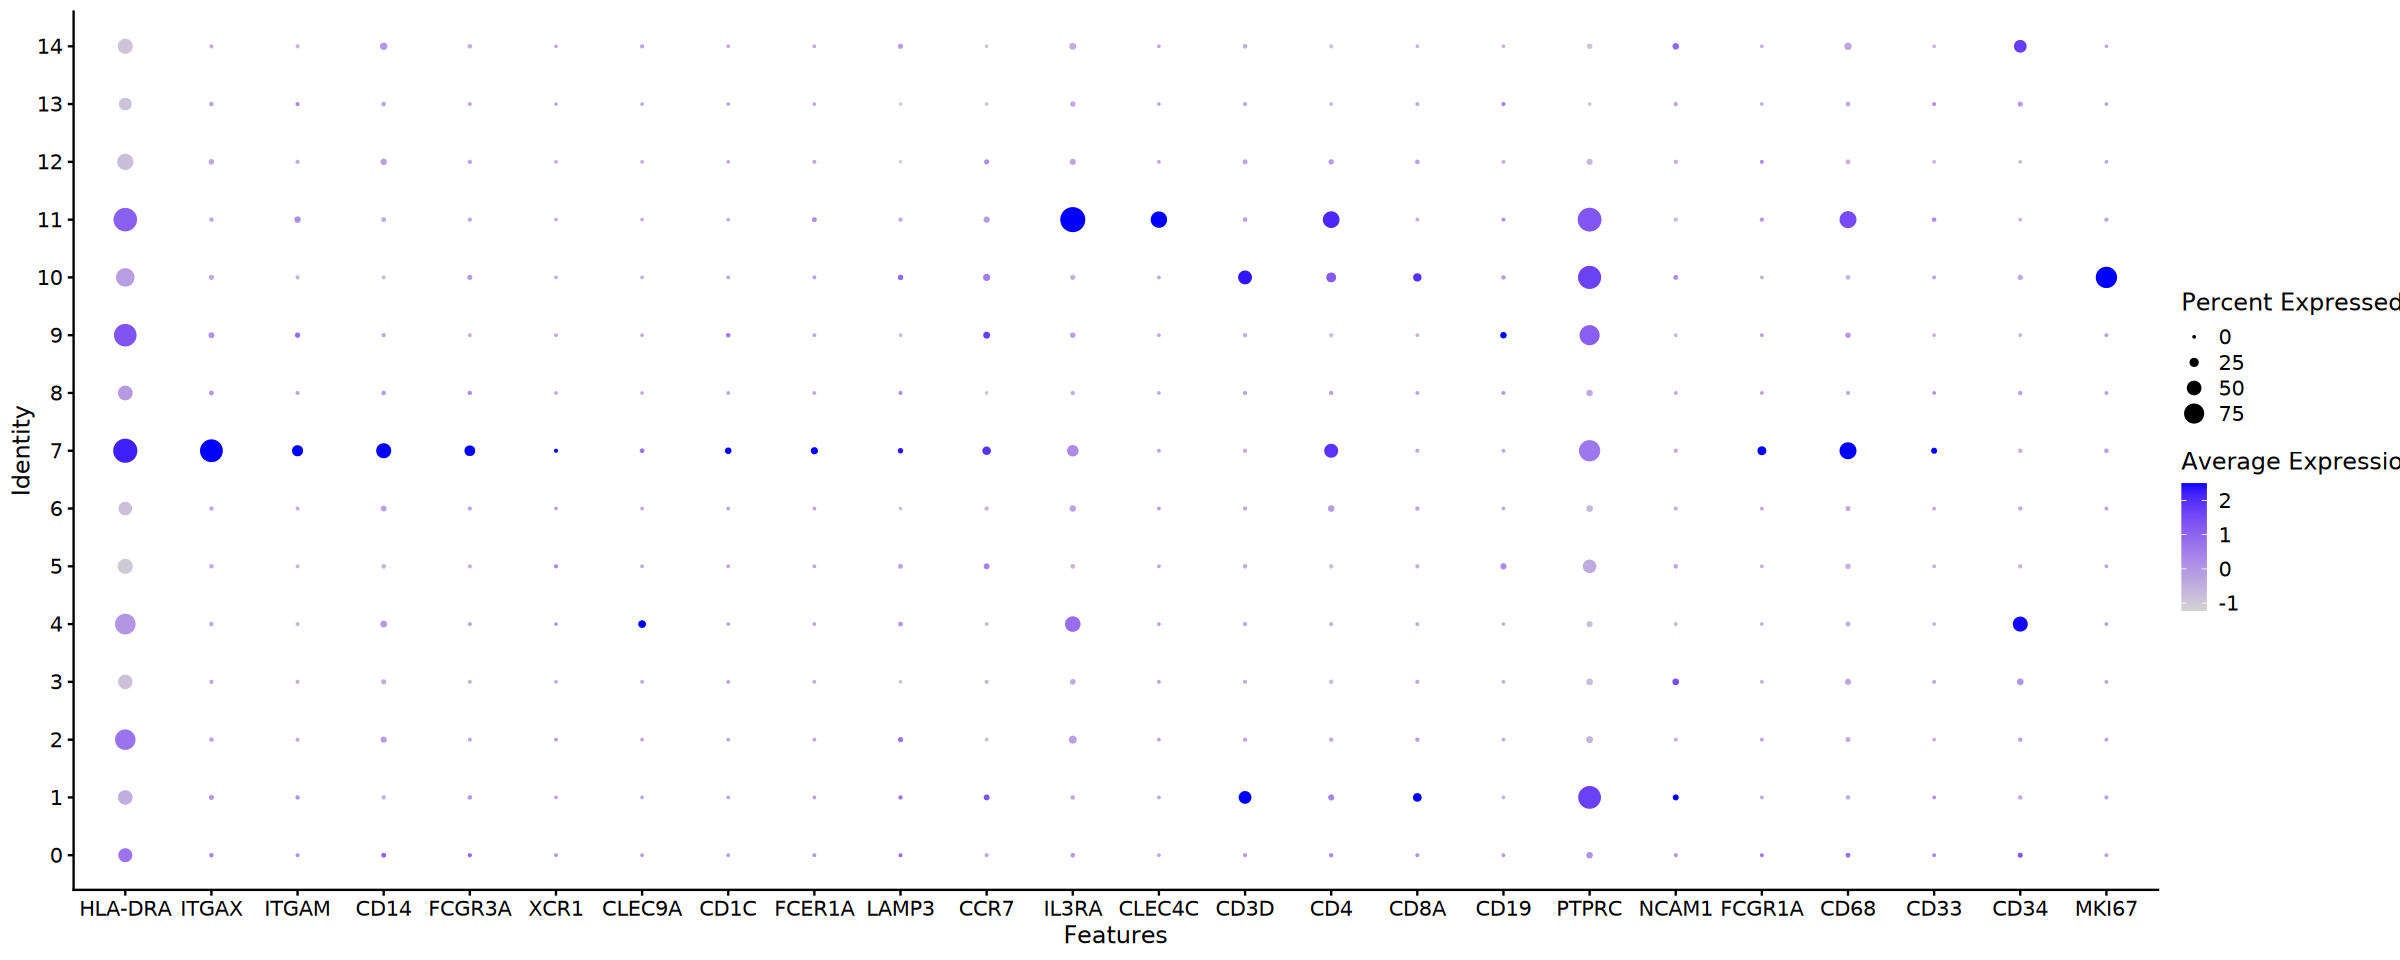

In [27]:
#Same as above but dot plot
options(repr.plot.height=8, repr.plot.width=20)
DotPlot(OC, features = c("HLA-DRA", "ITGAX", "ITGAM", "CD14", "FCGR3A", "XCR1", "CLEC9A", "CD1C", "FCER1A", "LAMP3", "CCR7", "IL3RA", "CLEC4C", "CD3D", "CD4", "CD8A", "CD19", "PTPRC", "NCAM1", "FCGR1A", "CD68", "CD33", "CD34", "MKI67"))

#### From above it looks like cluster 1 is the myeloid cells, now subsetting out cluster 1

In [29]:
head(OC@meta.data)

orig.ident nCount_RNA nFeature_RNA sample_type
GSE217517_pt1_AAACCCAAGATTGACA-1 GSE217517  14447      2170         tumour     
GSE217517_pt1_AAACCCAAGCATGGGT-1 GSE217517   6913      2328         tumour     
GSE217517_pt1_AAACCCAAGCGACATG-1 GSE217517   2608      1384         tumour     
GSE217517_pt1_AAACCCAAGTAGCATA-1 GSE217517   2190      1047         tumour     
GSE217517_pt1_AAACCCAAGTCACGCC-1 GSE217517   5445      1893         tumour     
GSE217517_pt1_AAACCCAAGTCGAAGC-1 GSE217517    639       419         tumour     
                                 cancer_type patient_id sample_id          
GSE217517_pt1_AAACCCAAGATTGACA-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCAAGCATGGGT-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCAAGCGACATG-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCAAGTAGCATA-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCAAGTCACGCC-1 HGSOC       pt1        GSE217517_HGSOC_pt1
GSE217517_pt1_AAACCCAAGTCGAAGC-1 HGSOC       pt1        GSE217517_HGSOC_pt1
                                 percent.mt RNA_snn_res.0.5 seurat_clusters
GSE217517_pt1_AAACCCAAGATTGACA-1  1.730463  10              12             
GSE217517_pt1_AAACCCAAGCATGGGT-1  6.061044  32              21             
GSE217517_pt1_AAACCCAAGCGACATG-1 15.835890  16              15             
GSE217517_pt1_AAACCCAAGTAGCATA-1 21.643836  21              2              
GSE217517_pt1_AAACCCAAGTCACGCC-1 11.202938  24              5              
GSE217517_pt1_AAACCCAAGTCGAAGC-1  3.599374  4               2              
                                 RNA_snn_res.0.2
GSE217517_pt1_AAACCCAAGATTGACA-1 12             
GSE217517_pt1_AAACCCAAGCATGGGT-1 21             
GSE217517_pt1_AAACCCAAGCGACATG-1 15             
GSE217517_pt1_AAACCCAAGTAGCATA-1 2              
GSE217517_pt1_AAACCCAAGTCACGCC-1 5              
GSE217517_pt1_AAACCCAAGTCGAAGC-1 2

In [ ]:
myeloid_OC <- subset(OC, subset = RNA_snn_res.0.2 %in% c("1,2,3"))

In [31]:
myeloid_OC

An object of class Seurat 
36601 features across 8457 samples within 1 assay 
Active assay: RNA (36601 features, 2000 variable features)
 17 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, scale.data
 2 dimensional reductions calculated: pca, umap

In [32]:
saveRDS(myeloid_OC, "/scratch/user/s4436039/scdata/GSE217517/GSE217517_myeloid.RDS")

#### Following the above then need to move entire GSE184880 folder from scratch to rdm
``` bash
rsync -azvhp /scratch/user/s4436039/scdata/GSE217517/ /QRISdata/Q5935/nikita/scdata/GSE217517
```